In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("uncleaned_customer_data_with_numerics.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        303 non-null    object 
 1   Name              293 non-null    object 
 2   Email             299 non-null    object 
 3   Age               194 non-null    object 
 4   Country           270 non-null    object 
 5   SignupDate        280 non-null    object 
 6   LastLogin         258 non-null    object 
 7   TotalPurchase     283 non-null    float64
 8   Feedback          207 non-null    object 
 9   CartValue         281 non-null    float64
 10  ItemsBought       115 non-null    float64
 11  DiscountApplied   254 non-null    float64
 12  AvgPurchaseValue  104 non-null    float64
dtypes: float64(5), object(8)
memory usage: 31.6+ KB


| Column           | Null Count | Null % |
| ---------------- | ---------- | ------ |
| CustomerID       | 7          | 2.26%  |
| Name             | 17         | 5.48%  |
| Email            | 11         | 3.55%  |
| Age              | 116        | 37.42% |
| Country          | 40         | 12.90% |
| SignupDate       | 30         | 9.68%  |
| LastLogin        | 52         | 16.77% |
| TotalPurchase    | 27         | 8.71%  |
| Feedback         | 103        | 33.23% |
| CartValue        | 29         | 9.35%  |
| ItemsBought      | 195        | 62.90% |
| DiscountApplied  | 56         | 18.06% |
| AvgPurchaseValue | 206        | 66.45% |

###  Total Null Summary

* **Total Cells** = 310 rows × 13 columns = **4,030**
* **Total Nulls** = **889**
* **Overall Null Percentage** = **22.06%**


In [4]:
print(df.isnull().sum())

CustomerID            7
Name                 17
Email                11
Age                 116
Country              40
SignupDate           30
LastLogin            52
TotalPurchase        27
Feedback            103
CartValue            29
ItemsBought         195
DiscountApplied      56
AvgPurchaseValue    206
dtype: int64


| Null % Range | Drop Rows | Impute   | Drop Column |
| ------------ | --------- | -------- | ----------- |
| 0–5%         | ✅ Safe    | ✅ Safe   | ❌ No        |
| 5–15%        | ⚠️ Risky  | ✅ Yes    | ❌ No        |
| 15–30%       | ❌ Risky   | ✅ Best   | ❌ Maybe     |
| 30–50%       | ❌ No      | ⚠️ Maybe | ✅ Maybe     |
| >50%         | ❌ No      | ❌ Rare   | ✅ Drop      |


### `Delete the columns` with null values only if the null percentage in that column is `less than or equal to5%`
Here, we will handle `CustomerID`, `Name`, `Email`

In [5]:
df_clear = df.dropna(subset=['CustomerID','Name','Email']) 
print(df_clear.isnull().sum())

CustomerID            0
Name                  0
Email                 0
Age                 108
Country              36
SignupDate           27
LastLogin            42
TotalPurchase        24
Feedback             90
CartValue            26
ItemsBought         169
DiscountApplied      50
AvgPurchaseValue    178
dtype: int64


Here the null value percentage of 'Name', 'Email', 'CustomerID' was less than equal to 5%. so, we deleted the rows with null values in these columns.
now, let’s check the null value percentage of the remaining columns..

In [6]:
null_percentage = df_clear.isnull().mean() * 100
print(null_percentage)

CustomerID           0.000000
Name                 0.000000
Email                0.000000
Age                 39.272727
Country             13.090909
SignupDate           9.818182
LastLogin           15.272727
TotalPurchase        8.727273
Feedback            32.727273
CartValue            9.454545
ItemsBought         61.454545
DiscountApplied     18.181818
AvgPurchaseValue    64.727273
dtype: float64


Now, the remaining percentgage is also reguced, there may be some rows that have multiple missing values.

### `Impute MissingValues` where null percentage is `less than 30`
Here we will handle `Age`, `Country`, `TotalPurchase`, `CartValue`, `DiscountApplied`

| Data Type   | Distribution     | Best Imputation |
| ----------- | ---------------- | --------------- |
| Numeric     | Normal/Symmetric | ✅ Mean          |
| Numeric     | Skewed/Outliers  | ✅ Median        |
| Categorical | Any              | ✅ Mode          |


In [7]:
# fill missing value with MODE
df_clear_2 = df_clear
set(df_clear_2.Country)

{'Germany', 'IN', 'India', 'USA', 'United States', 'ind', nan, 'usa'}

In [8]:
# here one countyr is represented in different ways
df_clear_2['Country'] = df_clear_2['Country'].replace('usa', 'United States')
df_clear_2['Country'] = df_clear_2['Country'].replace('USA', 'United States')
df_clear_2['Country'] = df_clear_2['Country'].replace('IN', 'India')
df_clear_2['Country'] = df_clear_2['Country'].replace('ind', 'India')

/var/folders/cp/2xjpmklx6jb8m1wqc30prz_00000gn/T/ipykernel_79019/3184171427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear_2['Country'] = df_clear_2['Country'].replace('usa', 'United States')
/var/folders/cp/2xjpmklx6jb8m1wqc30prz_00000gn/T/ipykernel_79019/3184171427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear_2['Country'] = df_clear_2['Country'].replace('USA', 'United States')
/var/folders/cp/2xjpmklx6jb8m1wqc30prz_00000gn/T/ipykernel_79019/3184171427.py:4: SettingWithCopyWar

This happen because `df_clear_2` is not original dataframe, it is a copy of original dataframe. 
to fix this issue, use `.loc[:, '']`. It tells pandas you are modifying the original DataFrame's column directly, not a copy.

In [9]:
country_map = {
    'usa': 'United States',
    'USA': 'United States',
    'IN': 'India',
    'ind': 'India'
}

In [10]:
df_clear_2.loc[:, 'Country'] = df_clear_2['Country'].replace(country_map)

In [11]:
set(df_clear_2.Country)

{'Germany', 'India', 'United States', nan}

Country
India            108
United States     93
Germany           38
Name: count, dtype: int64


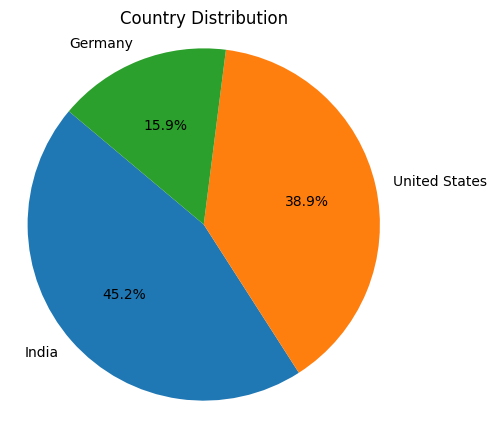

In [12]:
country_counts = df_clear_2['Country'].value_counts()
print(country_counts)
plt.figure(figsize=(5, 5))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle.
plt.show()

In [13]:
mode = df_clear_2['Country'].mode()
print(mode)
print(mode[0])

0    India
Name: Country, dtype: object
India


In [14]:
# now fill null val with MODE
df_clear_2.loc[:, 'Country'] = df_clear_2['Country'].fillna(mode[0])

Country
India            144
United States     93
Germany           38
Name: count, dtype: int64


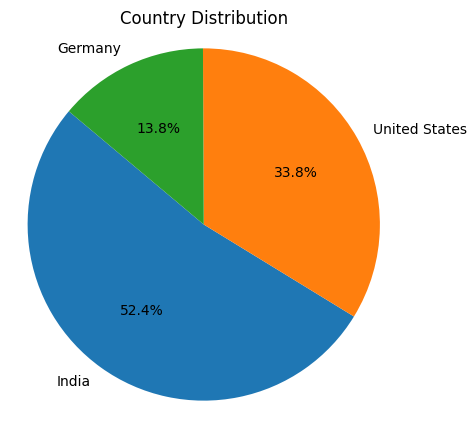

In [15]:
country_counts = df_clear_2['Country'].value_counts()
print(country_counts)
plt.figure(figsize=(5, 5))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle.
plt.show()

In [16]:
df_clear_2.TotalPurchase

0       80.63
1       27.38
2      817.67
3       29.28
4      829.67
        ...  
305    699.01
306    435.15
307    814.79
308    512.18
309    831.78
Name: TotalPurchase, Length: 275, dtype: float64

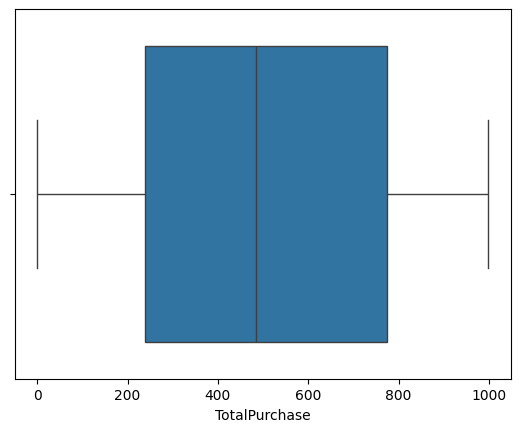

In [17]:
# check for outliers
sb.boxplot(x=df_clear_2['TotalPurchase'])
plt.show()

In [18]:
# No outliers here
df_clear_2.loc[:, 'TotalPurchase'] = df_clear_2.TotalPurchase.fillna(df_clear_2.TotalPurchase.mean())

In [19]:
df_clear_2.CartValue

0      196.06
1      136.79
2      239.65
3      291.47
4         NaN
        ...  
305    331.02
306    243.47
307    257.75
308     59.99
309    496.60
Name: CartValue, Length: 275, dtype: float64

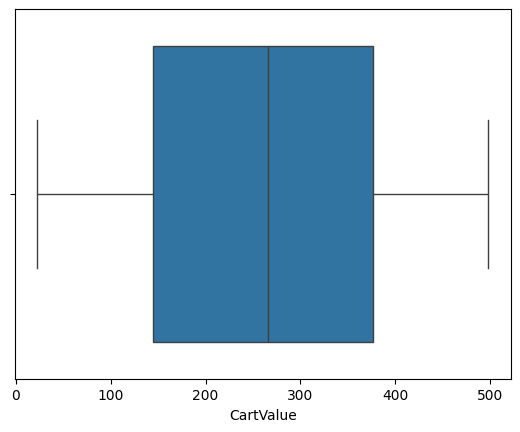

In [20]:
# check for outliers
sb.boxplot(x=df_clear_2['CartValue'])
plt.show()

In [21]:
# No outliers here
df_clear_2.loc[:, 'CartValue'] = df_clear_2.CartValue.fillna(df_clear_2.CartValue.mean())

In [22]:
df_clear_2.DiscountApplied

0      50.0
1       0.0
2      20.0
3      10.0
4      15.0
       ... 
305    10.0
306    20.0
307     5.0
308     5.0
309     5.0
Name: DiscountApplied, Length: 275, dtype: float64

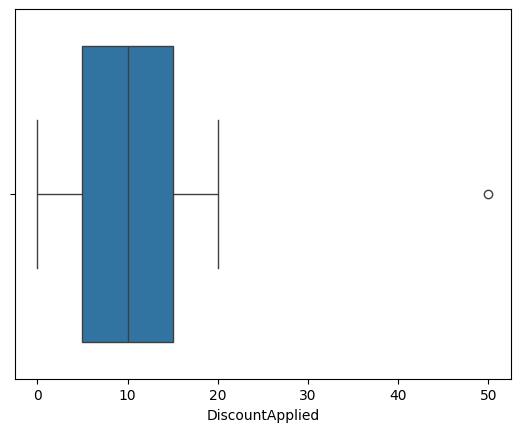

In [23]:
# check for outliers
sb.boxplot(x=df_clear_2['DiscountApplied'])
plt.show()

In [24]:
# we have an outlier here
df_clear_2.loc[:, 'DiscountApplied'] = df_clear_2.DiscountApplied.fillna(df_clear_2.DiscountApplied.median())

Now for `Age`, it is object type, first we need to convert in numric type, then, we will check frequency of each age.. 

if age is uniformly distributed, then we will randomly fill null values with any age from the range of age.

we could also do mean or median but Null percentage of age is quiet largr, hence it will affect the data.

In [28]:
# convert to numeric character
df_clear_2.loc[:,'Age'] = pd.to_numeric(df_clear_2['Age'], errors='coerce')

In [29]:
df_clear_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 309
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        275 non-null    object 
 1   Name              275 non-null    object 
 2   Email             275 non-null    object 
 3   Age               80 non-null     float64
 4   Country           275 non-null    object 
 5   SignupDate        248 non-null    object 
 6   LastLogin         233 non-null    object 
 7   TotalPurchase     275 non-null    float64
 8   Feedback          185 non-null    object 
 9   CartValue         275 non-null    float64
 10  ItemsBought       106 non-null    float64
 11  DiscountApplied   275 non-null    float64
 12  AvgPurchaseValue  97 non-null     float64
dtypes: float64(6), object(7)
memory usage: 30.1+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

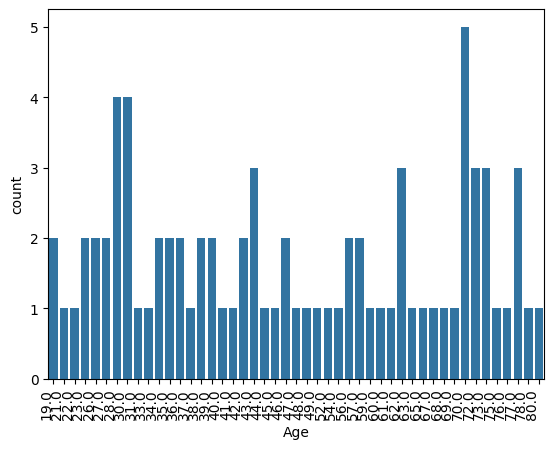

In [30]:
sb.countplot(x=df_clear_2['Age'])
plt.xticks(rotation=90, ha='right')
plt.show

No age is significantly higher
- Create an array of valid (non-null, reasonable) age values
- Randomly fill NaN values in the 'Age' column using values from that array

In [31]:
age = list(set(df_clear_2['Age'].dropna()))
print(age)

[19.0, 21.0, 22.0, 23.0, 26.0, 27.0, 28.0, 30.0, 31.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 52.0, 54.0, 56.0, 57.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 80.0]


In [32]:
df_clear_2.loc[:,'Age'] = df_clear_2.Age.apply(
    lambda x: np.random.choice(age) if pd.isna(x) else x
)

<function matplotlib.pyplot.show(close=None, block=None)>

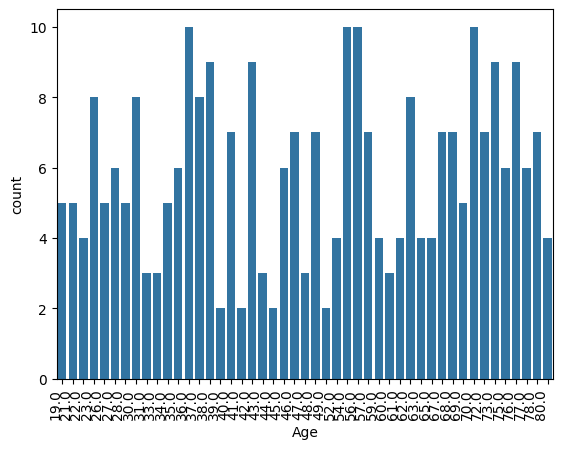

In [33]:
sb.countplot(x=df_clear_2['Age'])
plt.xticks(rotation=90, ha='right')
plt.show

In [34]:
null_percentage = df_clear_2.isnull().mean() * 100
print(null_percentage)

CustomerID           0.000000
Name                 0.000000
Email                0.000000
Age                  0.000000
Country              0.000000
SignupDate           9.818182
LastLogin           15.272727
TotalPurchase        0.000000
Feedback            32.727273
CartValue            0.000000
ItemsBought         61.454545
DiscountApplied      0.000000
AvgPurchaseValue    64.727273
dtype: float64


### `Droping Column` if null percentage in column is `greater than 50%`
Droping `ItemsBought` and `AvgPurchaseValue` columns 

In [ ]:
df.drop(columns=['ItemsBought', 'AvgPurchaseValue'], inplace=True)

In [47]:
null_percentage = df_clear_2.isnull().mean() * 100
print(null_percentage)

CustomerID          0.000000
Name                0.000000
Email               0.000000
Age                 0.000000
Country             0.000000
SignupDate          9.818182
LastLogin          15.272727
TotalPurchase       0.000000
Feedback           32.727273
CartValue           0.000000
DiscountApplied     0.000000
dtype: float64


The `Feedback` column represents personal responses voluntarily given by customers. Since it's a form of subjective input, it's completely acceptable to have null values — not every customer is expected to leave feedback. These missing values don't indicate poor data quality; rather, they reflect the natural behavior of users.

####  `SignupDate` and `LastLogin` are `datetime` columns, they hold temporal information, 

Convert to `datetime` format

In [49]:
df_clear_2.loc[:,'SignupDate'] = pd.to_datetime(df_clear_2['SignupDate'], errors='coerce')
df_clear_2.loc[:,'LastLogin'] = pd.to_datetime(df_clear_2['LastLogin'], errors='coerce')

In [50]:
df_clear_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       275 non-null    object        
 1   Name             275 non-null    object        
 2   Email            275 non-null    object        
 3   Age              275 non-null    float64       
 4   Country          275 non-null    object        
 5   SignupDate       248 non-null    datetime64[ns]
 6   LastLogin        233 non-null    datetime64[ns]
 7   TotalPurchase    275 non-null    float64       
 8   Feedback         185 non-null    object        
 9   CartValue        275 non-null    float64       
 10  DiscountApplied  275 non-null    float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 25.8+ KB


Fill with `SignupDate` earliest valid date

In [51]:
df_clear_2.loc[:,'SignupDate'] = df_clear_2['SignupDate'].fillna(df_clear_2['SignupDate'].min())

Fill `LastLogin` with column median

In [55]:
median_login = df_clear_2['LastLogin'].dropna().median()

In [56]:
median_login

Timestamp('2025-03-08 00:47:59')

In [57]:
df_clear_2.loc[:,'LastLogin'] = df_clear_2['LastLogin'].fillna(median_login)

In [58]:
df_clear_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       275 non-null    object        
 1   Name             275 non-null    object        
 2   Email            275 non-null    object        
 3   Age              275 non-null    float64       
 4   Country          275 non-null    object        
 5   SignupDate       275 non-null    datetime64[ns]
 6   LastLogin        275 non-null    datetime64[ns]
 7   TotalPurchase    275 non-null    float64       
 8   Feedback         185 non-null    object        
 9   CartValue        275 non-null    float64       
 10  DiscountApplied  275 non-null    float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 25.8+ KB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       303 non-null    object 
 1   Name             293 non-null    object 
 2   Email            299 non-null    object 
 3   Age              194 non-null    object 
 4   Country          270 non-null    object 
 5   SignupDate       280 non-null    object 
 6   LastLogin        258 non-null    object 
 7   TotalPurchase    283 non-null    float64
 8   Feedback         207 non-null    object 
 9   CartValue        281 non-null    float64
 10  DiscountApplied  254 non-null    float64
dtypes: float64(3), object(8)
memory usage: 26.8+ KB


In [60]:
df = df_clear_2

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       275 non-null    object        
 1   Name             275 non-null    object        
 2   Email            275 non-null    object        
 3   Age              275 non-null    float64       
 4   Country          275 non-null    object        
 5   SignupDate       275 non-null    datetime64[ns]
 6   LastLogin        275 non-null    datetime64[ns]
 7   TotalPurchase    275 non-null    float64       
 8   Feedback         185 non-null    object        
 9   CartValue        275 non-null    float64       
 10  DiscountApplied  275 non-null    float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 25.8+ KB


In [62]:
df.to_csv('cleaned_data.csv', index=False)